### Heat Transfer in an Annular fin

An annular fin is a specific type of fin used in heat transfer that varies, radially, in cross-sectional area. Because surface area increases as length from the object increases, an annular fin transfers more heat than a similar pin fin at any given length. Annular fins are often used to increase the heat exchange in liquid–gas heat exchanger systems.

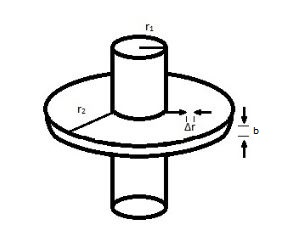

In [4]:
from IPython.display import Image
Image(filename='Annular fin.jpg')

In order to understand the temperature profile, we must first devise an energy conservation equation
$$In - Out + Generation = Accumulation$$

If we assume steady state, we can say that there is no generation or accumulation of heat in the fin.
$$\therefore In - Out = 0$$

For any particular section of the annulus of thickness dr at distance r from the center, the thermal energy $q_r$ enters in the form of conduction.
The heat is diffused to the next section in the form of conduction $q_{r+dr}$ and to the surrounding in the form of convection $dq_{conv}$

Thus the energy conservation equation can be written as 
$$q_r - q_{r+dr} - dq_{conv} = 0$$

Using Taylor series,
$$q_{r+dr} = q_r + q'_r*dr + \frac{1}{2!}q''_r*{dr}^2 + ...$$

As $dr \rightarrow 0$, ${dr}^2$ and the succeeding terms become negligible.  
$$q_{r+dr} = q_r + q'_r*dr$$

Therefore the energy conservation equation becomes

$$-q'_r*dr - dq_{conv} = 0$$
$$-\frac{\delta q_r}{\delta r}*dr - dq_{conv} = 0$$

$$\because q_r = -k*\frac{dT}{dr}*2\pi rb$$

$$-\frac{\delta}{\delta r}\bigg[-k*\frac{dT}{dr}*2\pi r b\bigg]*dr - dq_{conv} = 0$$

$$2\pi k b\bigg[r\frac{\delta^2 T}{\delta r^2} + \frac{\delta T}{\delta r}\bigg]*dr - dq_{conv} = 0$$

For the convection term, the heat from a section of the annulus of thickness dr at distance r from the center is given by

$$dq_{conv} = h*(T - T_{\infty})*2\pi r dr *2$$
$$dq_{conv} = 4 \pi r h*(T - T_{\infty})dr$$

The conservation equation: 

$$2\pi k b\bigg[r\frac{\delta^2 T}{\delta r^2} + \frac{\delta T}{\delta r}\bigg]*dr - 4 \pi r h*(T - T_{\infty})dr = 0$$

$$\frac{d^2 T}{d r^2} + \frac{1}{r}\frac{d T}{d r} - \frac{2 h}{k b}*(T - T_{\infty})dr = 0$$

Let $\theta = T - T_\infty$ and $ m^2 = \frac{2h}{kb}$

$$\therefore \frac{d^2 \theta}{d r^2} + \frac{1}{r}\frac{d \theta}{d r} - m^2 \theta = 0$$

#### We can use the modified bessel function of the order zero!

Whose general solution is given by

$$\theta (r) = c_1*I_0 (mr) + c_2*K_0 (mr)$$

Boundary conditions:

At $r = r_1, \theta (r_1) = \theta_b = T_b-T_\infty$

At $r = r_2, \frac{d\theta}{dr} (r_2) =  0$

Thus, we get
$$\frac{\theta}{\theta_b} = \frac{K_1 (mr_2)*I_0 (mr) + I_1 (mr_2)*K_0 (mr)}{K_1 (mr_2)*I_0 (mr_1) + I_1 (mr_2)*K_0 (mr_1)}$$

where $$I_1 (mr) = \frac{d[I_0 (mr)]}{d[mr]}$$ and $$K_1 (mr) = -\frac{d[K_0 (mr)]}{d[mr]}$$

$$T = T_\infty + (T_b - T_\infty) \frac{K_1 (\sqrt(\frac{2h}{kb})r_2)*I_0 (\sqrt(\frac{2h}{kb})r) + I_1 (\sqrt(\frac{2h}{kb})r_2)*K_0 (\sqrt(\frac{2h}{kb})r)}{K_1 (\sqrt(\frac{2h}{kb})r_2)*I_0 (\sqrt(\frac{2h}{kb})r_1) + I_1 (\sqrt(\frac{2h}{kb})r_2)*K_0 (\sqrt(\frac{2h}{kb})r_1)}$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv, kv, iv, yv

C:\Users\my pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
C:\Users\my pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


Text(0, 0.5, 'T(r) (K)')

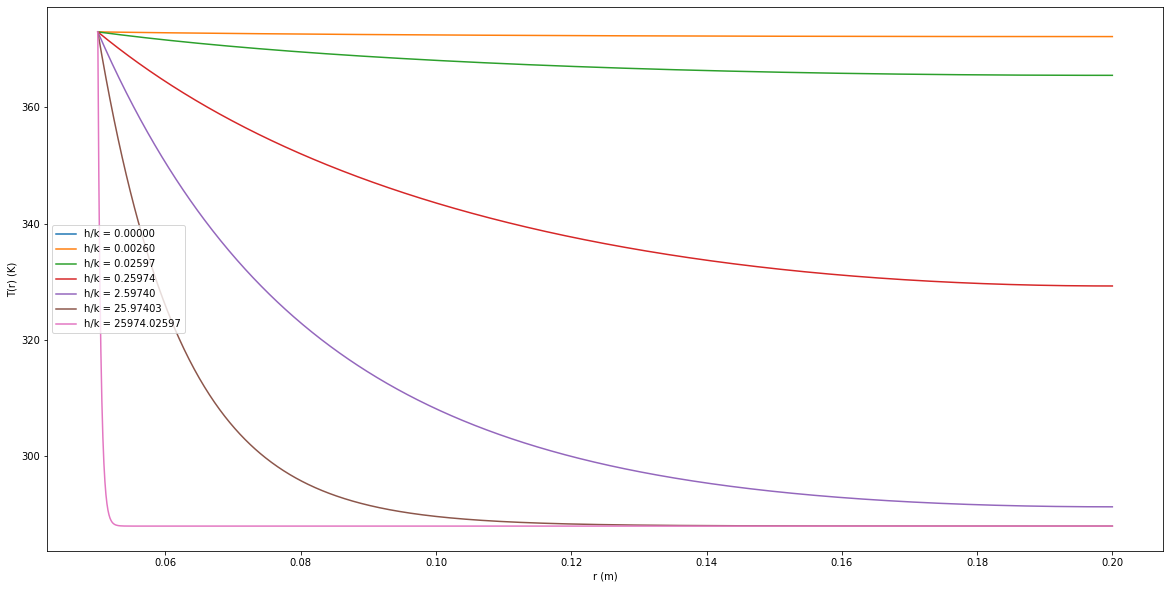

In [24]:
h = [0, 1, 10, 100, 1000, 10000, 10000000]
k = 385 # for copper
b = 0.01 #thickness of the fin
r1 = 0.05 #radius of the pipe (4" Dia pipe)
r2 = 0.20 #outer radius of the fin (20" fin)
Tinf = 288 #Atmospheric temperature
Tb = 373 #Temperature of steam
r = np.linspace(0.05,0.20,1000)

fig, ax = plt.subplots(figsize=(20, 10))

for e in range(0,len(h)):
    ratio = h[e]/k
    m = (2*h[e]/k/b)**0.5
    T = Tinf + (Tb - Tinf)*(kv(1, m*r2)*iv(0, m*r)+iv(1, m*r2)*kv(0, m*r))/(kv(1, m*r2)*iv(0, m*r1)+iv(1, m*r2)*kv(0, m*r1))
    ax.plot(r,T,label = 'h/k = %.5f' %ratio )


plt.legend()
plt.xlabel('r (m)')
plt.ylabel('T(r) (K)')